# Лекция 1

## Создание и визуализация просты графов

In [154]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

## 1.

1\.1\. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)

1\.2\. Визуализировать граф, построенный с помощью фукнции из задания 1.

Документация:
* https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
* https://networkx.github.io/documentation/stable/reference/drawing.html


In [ ]:
def create_circular_graph(n: int):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)])
    G.add_edges_from([(i, (i%(n-1))+1) for i in range(n-1)])
    G.add_edge(n-1, 0)
    return G

In [ ]:
#1.1
G = create_circular_graph(7)

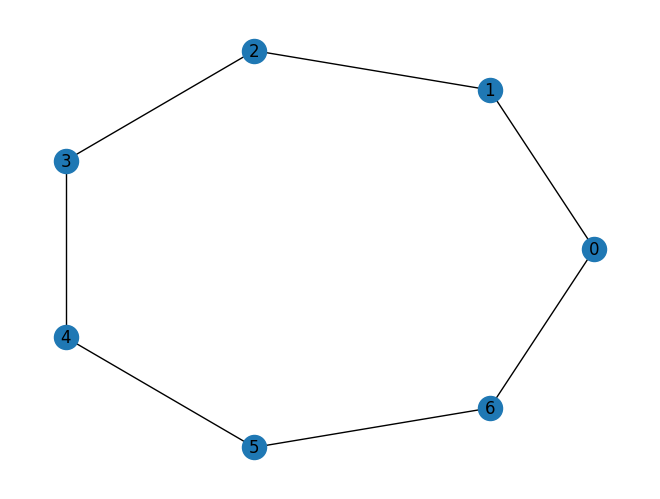

In [ ]:
#1.2
nx.draw_circular(G, with_labels=True)

## 2.

2\.1\. Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.

2\.2\. Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

2\.3\. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

2\.4\. Модифицировать функцию 2\.2\. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

2\.5-2\.8 Аналогичные задачи для треугольных решеток.

2\.9-2\.12\* Аналогичные задачи для гексогональных решеток.

In [2]:
def draw_graph(graph, pos, labels=None):
    plt.figure(figsize = (12, 12))
    nx.draw_networkx_nodes(graph, pos, nodelist=graph.nodes(),node_size=550)
    if labels:
        if labels == True:
            nx.draw_networkx_labels(graph, pos)
        else:
            nx.draw_networkx_labels(graph, pos, labels=labels)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=graph.edges())
    plt.axis('on')
    plt.show()

### 2.1-2.4

#### 2.1

In [ ]:
#2.1
m = 5
n = 4
G = nx.grid_2d_graph(m, n)
pos = ({i: (i[0], i[1]) for i in G.nodes()})

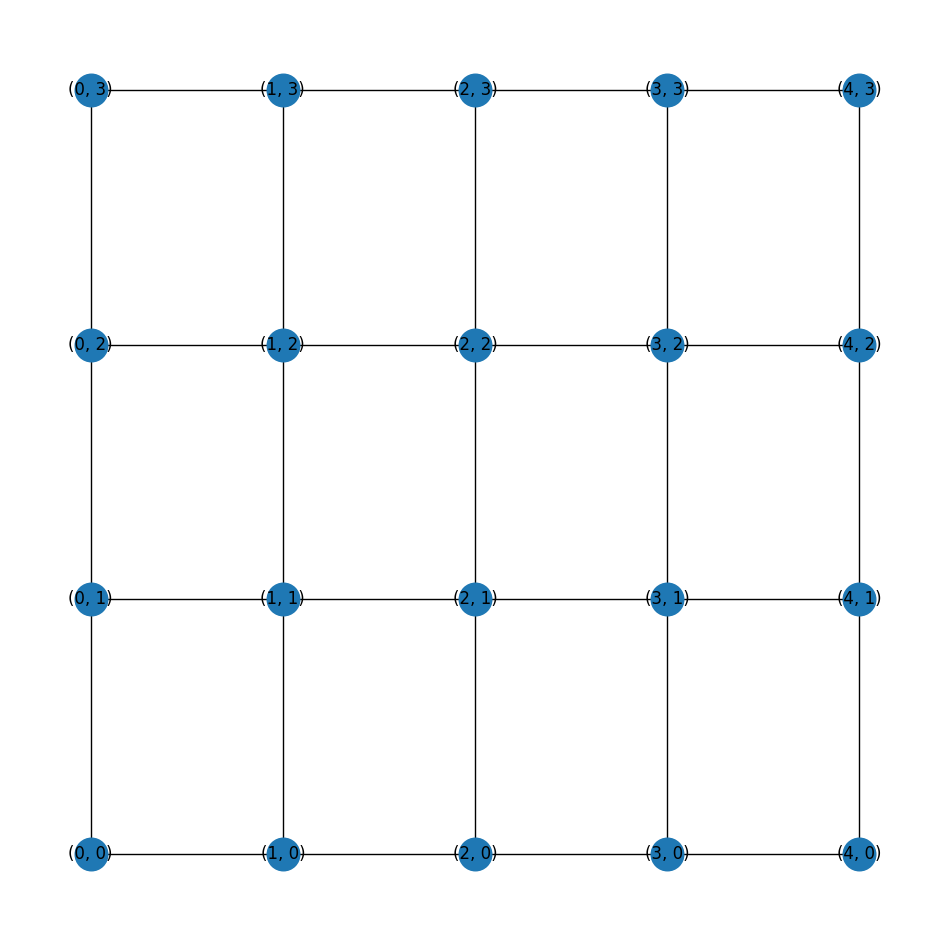

In [ ]:
draw_graph(G, pos, labels=True)

#### 2.2

In [ ]:
#2.2
def edgesgenerator(nodes, n, m):
    if len(nodes) == 0 or len(nodes) == 1:
        return []
    if len(nodes) == 2:
        return [(nodes[0], nodes[1])]
    edges = []
    for node in nodes:
        if (node[0]>0 and node[0]<n-1 and node[1]>0 and node[1]<m-1):
            edges.extend([(node, (node[0]-1, node[1])), (node, (node[0]+1, node[1])), (node, (node[0], node[1]-1)), (node, (node[0], node[1]+1))])
        elif (node[0] in (0, n-1) and node[1] in (0, m-1)):
            if (node[0] == 0):
                if node[1] == 0:
                    edges.extend([(node, (node[0]+1, node[1])), (node, (node[0], node[1]+1))])
                elif node[1] == m-1:
                    edges.extend([(node, (node[0]+1, node[1])), (node, (node[0], node[1]-1))])
            if (node[0] == n-1):
                if node[1] == 0:
                    edges.extend([(node, (node[0]-1, node[1])), (node, (node[0], node[1]+1))])
                elif node[1] == m-1:
                    edges.extend([(node, (node[0]-1, node[1])), (node, (node[0], node[1]-1))])
        elif (node[0] in (0, n-1)):
            edges.append((node, (node[0], node[1]+1)))
        elif (node[1] in (0, m-1)):
            edges.append((node, (node[0]+1, node[1])))

    return edges

In [ ]:
def create_2d_graph(n, m):
    G = nx.Graph()
    nodes = []
    edges = []
    for i in range(n):
        for j in range(m):
            nodes.append((i, j))
    edges = edgesgenerator(nodes, n, m)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_2d_graph(5, 4)
pos = ({i: (i[0], i[1]) for i in G.nodes()})

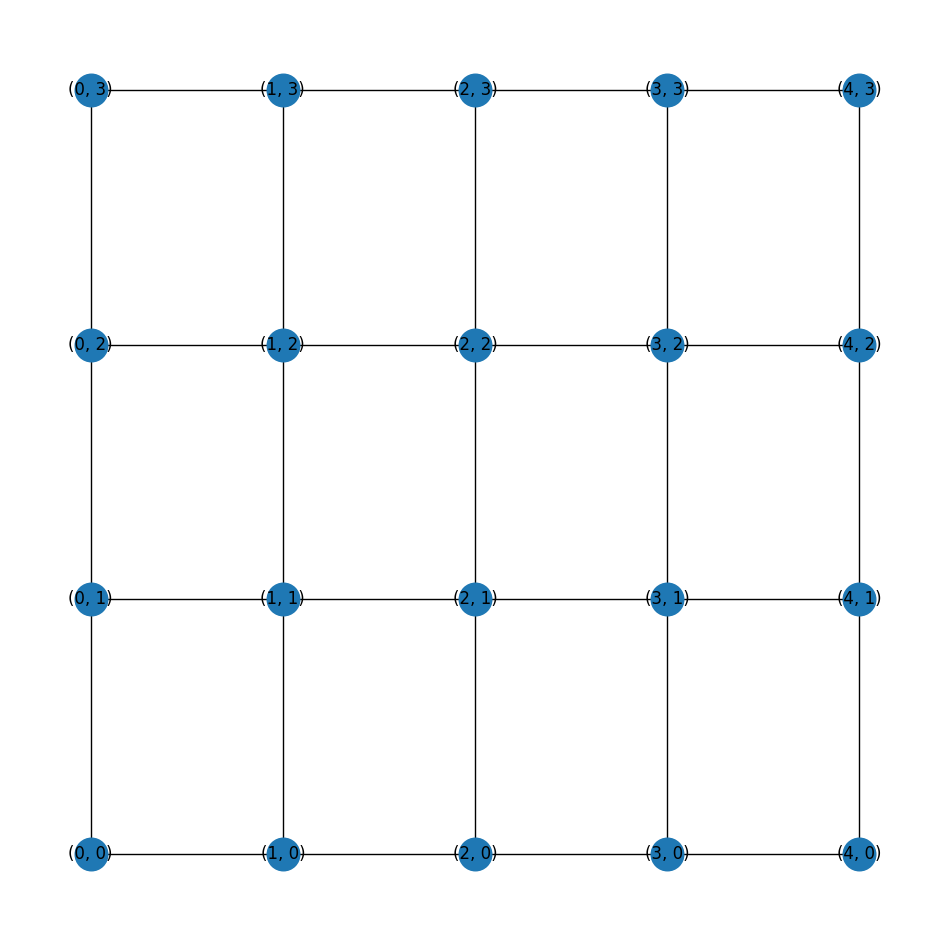

In [ ]:
draw_graph(G, pos, labels=True)

#### 2.3

In [ ]:
#2.3
def edgesgenerator(nodes, n, m):
    if len(nodes) == 0 or len(nodes) == 1:
        return []
    if len(nodes) == 2:
        return [(nodes[0], nodes[1])]
    edges = []
    for node in nodes:
        node = node[0]
        if (node[0]>0 and node[0]<n-1 and node[1]>0 and node[1]<m-1):
            edges.extend([(node, (node[0]-1, node[1])), (node, (node[0]+1, node[1])), (node, (node[0], node[1]-1)), (node, (node[0], node[1]+1))])
        elif (node[0] in (0, n-1) and node[1] in (0, m-1)):
            if (node[0] == 0):
                if node[1] == 0:
                    edges.extend([(node, (node[0]+1, node[1])), (node, (node[0], node[1]+1))])
                elif node[1] == m-1:
                    edges.extend([(node, (node[0]+1, node[1])), (node, (node[0], node[1]-1))])
            if (node[0] == n-1):
                if node[1] == 0:
                    edges.extend([(node, (node[0]-1, node[1])), (node, (node[0], node[1]+1))])
                elif node[1] == m-1:
                    edges.extend([(node, (node[0]-1, node[1])), (node, (node[0], node[1]-1))])
        elif (node[0] in (0, n-1)):
            edges.append((node, (node[0], node[1]+1)))
        elif (node[1] in (0, m-1)):
            edges.append((node, (node[0]+1, node[1])))

    return edges

In [ ]:
def create_2d_graph(n, m):
    G = nx.Graph()
    nodes = []
    edges = []
    for i in range(n):
        for j in range(m):
            nodes.append(((i, j), {'pos': (i, j)}))
    edges = edgesgenerator(nodes, n, m)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_2d_graph(5, 4)
pos = nx.get_node_attributes(G, 'pos')

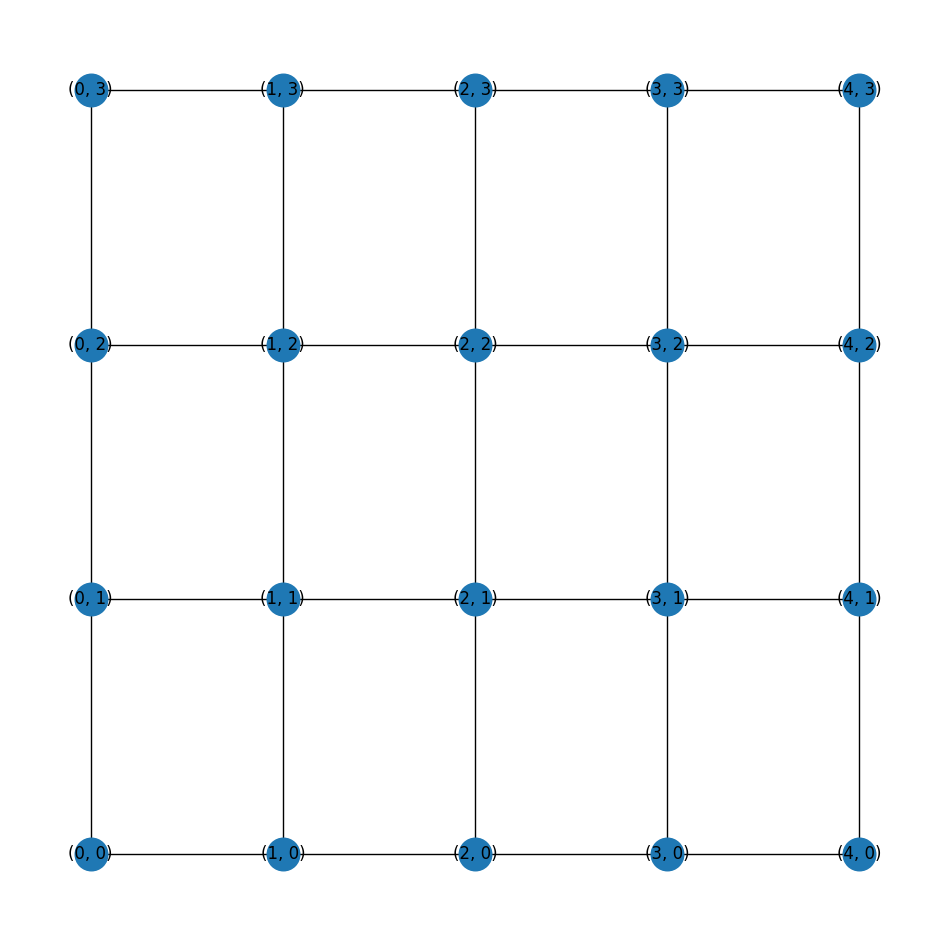

In [ ]:
draw_graph(G, pos, labels=True)

#### 2.4

In [ ]:
#2.4
def edgesgenerator(nodes, n, m, row_circ=False, column_circ=False):
    if len(nodes) == 0 or len(nodes) == 1:
        return []
    if len(nodes) == 2:
        return [(nodes[0], nodes[1])]
    edges = []
    for node in nodes:
        node = node[0]
        if (node[0]>0 and node[0]<n-1 and node[1]>0 and node[1]<m-1):
            edges.extend([(node, (node[0]-1, node[1])), (node, (node[0]+1, node[1])), (node, (node[0], node[1]-1)), (node, (node[0], node[1]+1))])
        elif (node[0] in (0, n-1) and node[1] in (0, m-1)):
            if (node[0] == 0):
                if node[1] == 0:
                    edges.extend([(node, (node[0]+1, node[1])), (node, (node[0], node[1]+1))])
                elif node[1] == m-1:
                    edges.extend([(node, (node[0]+1, node[1])), (node, (node[0], node[1]-1))])
            if (node[0] == n-1):
                if node[1] == 0:
                    edges.extend([(node, (node[0]-1, node[1])), (node, (node[0], node[1]+1))])
                elif node[1] == m-1:
                    edges.extend([(node, (node[0]-1, node[1])), (node, (node[0], node[1]-1))])
        elif (node[0] in (0, n-1)):
            edges.append((node, (node[0], node[1]+1)))
        elif (node[1] in (0, m-1)):
            edges.append((node, (node[0]+1, node[1])))
    if row_circ==True:
        edges.extend([((0, i), (n-1, i)) for i in range(m)])
    if column_circ==True:
        edges.extend([((i, 0), (i, m-1)) for i in range(n)])

    return edges

In [ ]:
def create_2d_graph(n, m, row_circ=False, column_circ=False):
    G = nx.Graph()
    nodes = []
    edges = []
    for i in range(n):
        for j in range(m):
            nodes.append(((i, j), {'pos': (i, j)}))
    edges = edgesgenerator(nodes, n, m, row_circ, column_circ)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_2d_graph(5, 4, row_circ=True, column_circ=True)
pos = nx.spring_layout(G)

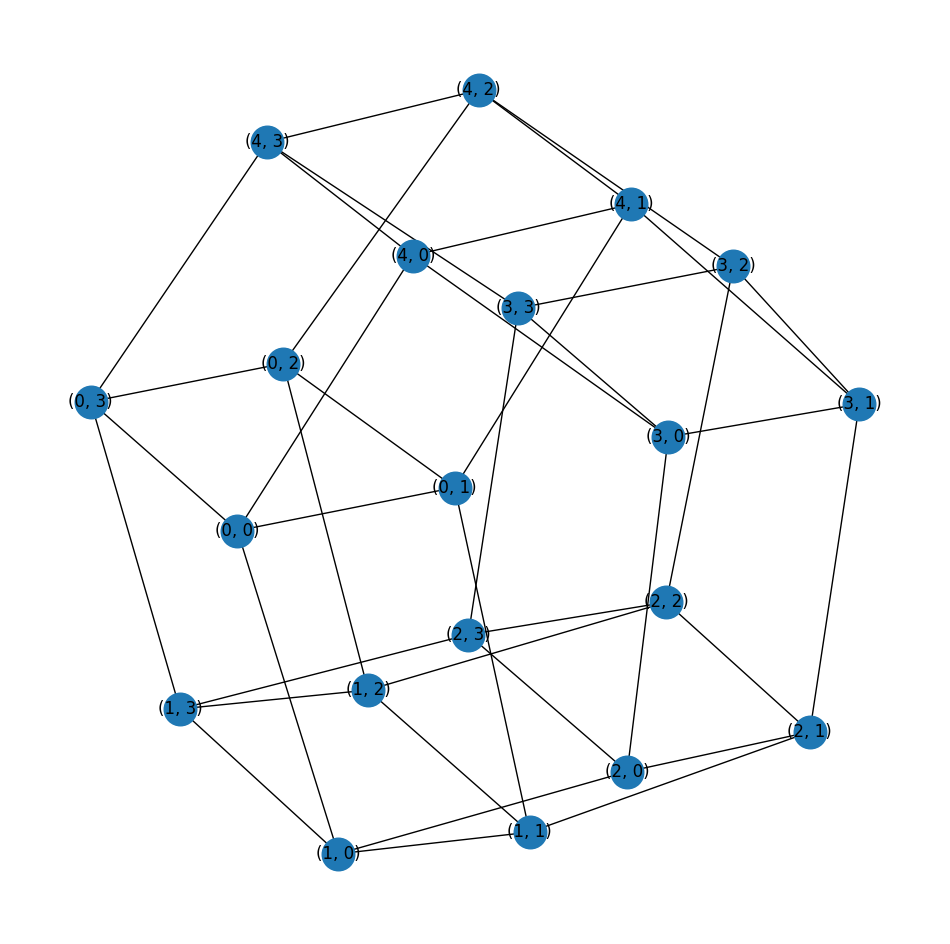

In [ ]:
draw_graph(G, pos, labels=True)

### 2.5 - 2.8

#### 2.5

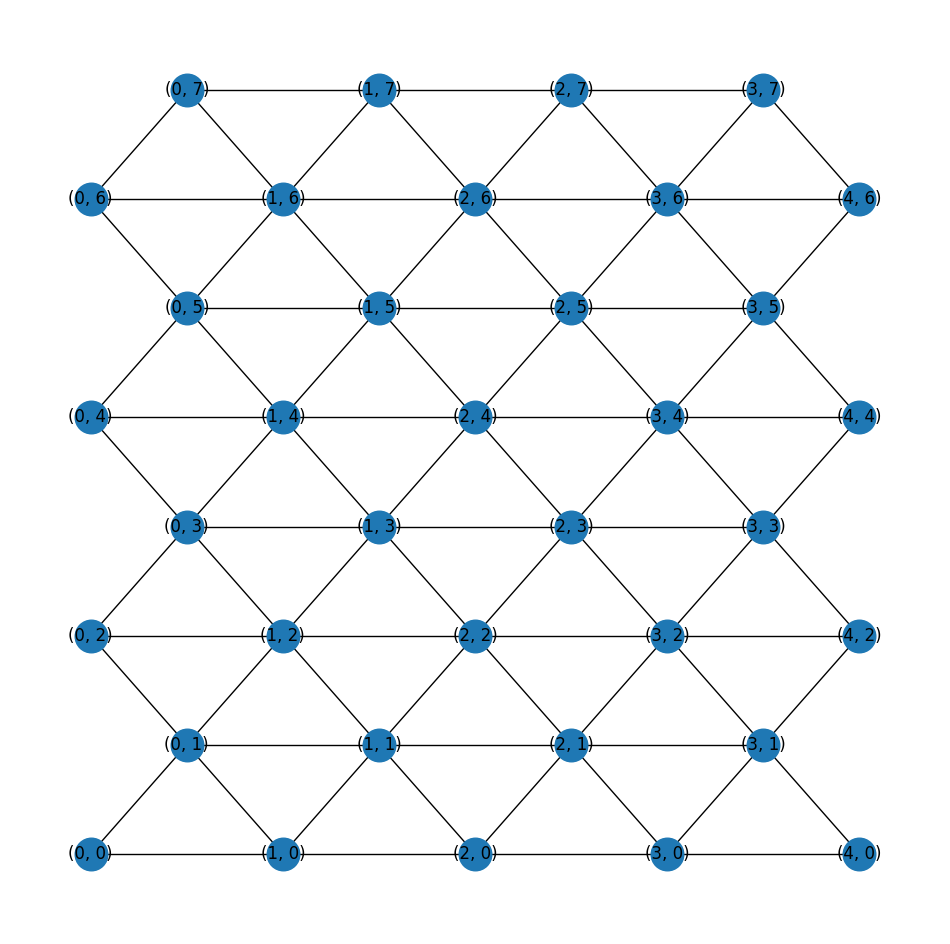

In [ ]:
m,n = 7,7
G = nx.triangular_lattice_graph(m, n, periodic=False, with_positions=True, create_using=None)
pos = nx.get_node_attributes(G, 'pos')
draw_graph(G, pos, labels=True)

#### 2.6

In [ ]:
def generate_edges_tri(m, n):
    edges = []
    if n%2==0:
        if m%2==0:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            for row_pos in range(m):
                for col_pos in range(n//2+1):
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=n//2:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        if row_pos%2!=0:
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos+1)))
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos-1)))
        else:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            edges.extend([((i, m), (i+1, m-1)) for i in range(n//2)])
            for row_pos in range(m):
                for col_pos in range(n//2+1):
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=n//2:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        if row_pos!=0 and row_pos%2==1:
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos+1)))
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos-1)))

    else:
        if m%2==0:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2+1)])
            for row_pos in range(m):
                nodes_in_row = n//2 + 1 + (row_pos+1)%2
                for col_pos in range(nodes_in_row):
                    if col_pos < n//2 + 1:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=nodes_in_row-1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                    if row_pos%2==1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos+1)))



        else:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            edges.extend([((i, m), (i+1, m-1)) for i in range(n//2+1)])
            for row_pos in range(m):
                nodes_in_row = n//2 + 1 + (row_pos+1)%2
                for col_pos in range(nodes_in_row):
                    if col_pos < nodes_in_row - 1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if row_pos%2==1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos+1)))
                        if col_pos == nodes_in_row-1:
                            edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))

    return edges

In [ ]:
def create_triangular_lattice_graph(m, n): # m - column count of triangles, n - row count of triangles
    G = nx.Graph()
    nodes = []
    if n == 0 or m == 0:
        nodes = []
        G.add_nodes_from(nodes)
        return G
    elif n%2==1:
        for row_pos in range(m+1):
            max_nodes_in_row = n//2 + 1 + (row_pos+1)%2
            for col_pos in range(max_nodes_in_row):
                nodes.append(((col_pos, row_pos), {'pos': (col_pos+(row_pos%2)/2, row_pos)}))
    else:
        for row_pos in range(m+1):
            max_nodes_in_row = n//2+1 if m%2==0 else n//2+1
            for col_pos in range(max_nodes_in_row):
                nodes.append(((col_pos, row_pos), {'pos': (col_pos+(row_pos%2)/2, row_pos)}))
    edges = generate_edges_tri(m, n)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_triangular_lattice_graph(5, 3)
pos = nx.get_node_attributes(G, 'pos')

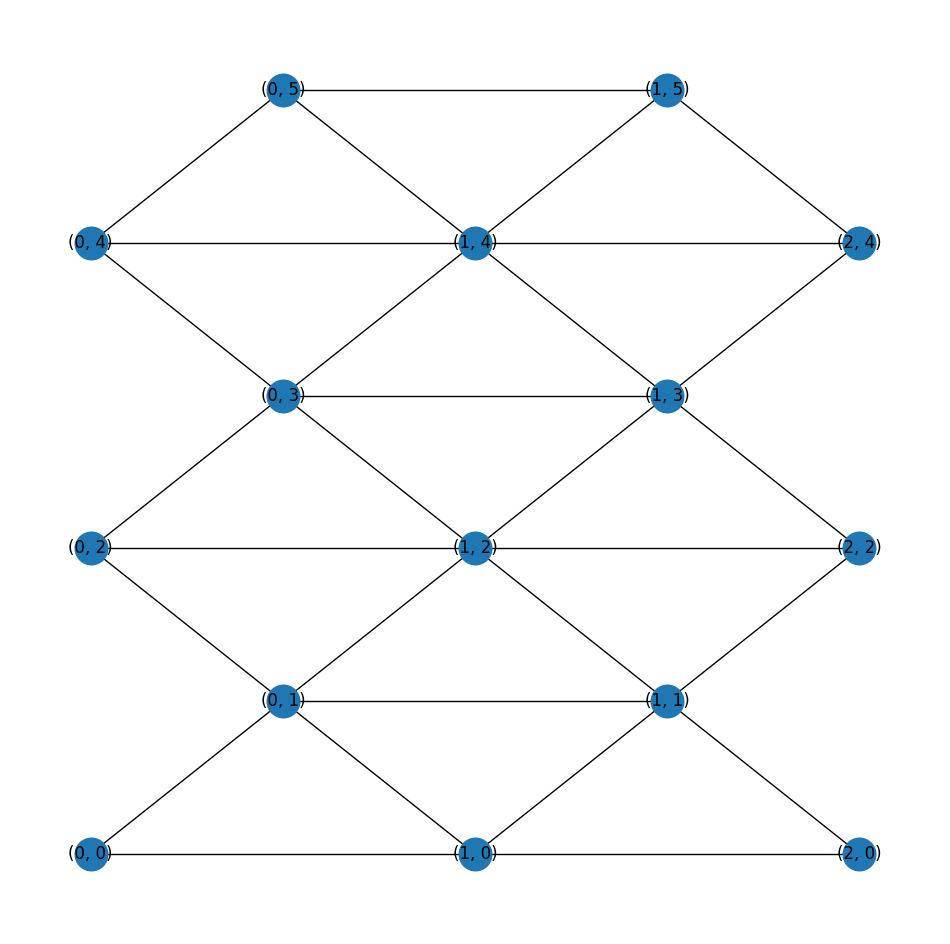

In [ ]:
draw_graph(G, pos, labels=True)

#### 2.7

In [ ]:
def generate_edges_tri(m, n, row_circ=False, col_circ=False):
    edges = []
    if n%2==0:
        nodes_bottom_c = n//2 + 1
        if m%2==0:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            for row_pos in range(m):
                for col_pos in range(n//2+1):
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=n//2:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        if row_pos%2!=0:
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos+1)))
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos-1)))
        else:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            edges.extend([((i, m), (i+1, m-1)) for i in range(n//2)])
            for row_pos in range(m):
                for col_pos in range(n//2+1):
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=n//2:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        if row_pos!=0 and row_pos%2==1:
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos+1)))
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos-1)))
    else:
        if m%2==0:
            nodes_bottom_c = n//2 + 2
            edges.extend([((i, m), (i+1, m)) for i in range(n//2+1)])
            for row_pos in range(m):
                nodes_in_row = n//2 + 1 + (row_pos+1)%2
                for col_pos in range(nodes_in_row):
                    if col_pos < n//2 + 1:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=nodes_in_row-1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                    if row_pos%2==1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos+1)))
        else:
            nodes_bottom_c = n//2 + 1
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            edges.extend([((i, m), (i+1, m-1)) for i in range(n//2+1)])
            for row_pos in range(m):
                nodes_in_row = n//2 + 1 + (row_pos+1)%2
                for col_pos in range(nodes_in_row):
                    if col_pos < nodes_in_row - 1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if row_pos%2==1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos+1)))
                        if col_pos == nodes_in_row-1:
                            edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
    if col_circ:
        if m%2==1 and n%2==1:
            edges.extend([((i, 0), (i, m)) for i in range(nodes_bottom_c)])
            edges.extend([((i, 0), (i-1, m)) for i in range(1, nodes_bottom_c+1)])
        else:
            edges.extend([((i, 0), (i, m)) for i in range(nodes_bottom_c)])
            edges.extend([((i, 0), (i-1, m)) for i in range(1, nodes_bottom_c)])
    if row_circ:
        if n%2==0:
            edges.extend([((0, i), (n//2, i)) for i in range(m+1)])
            edges.extend([((0, i), (n//2, i-1)) for i in range(1, m+1)])
        else:
            edges.extend([((0, i), (n//2+(i+1)%2, i)) for i in range(m+1)])
            edges.extend([((0, i-1), (n//2, i)) for i in range(1, m+1, 2)])
            edges.extend([((0, i-1), (n//2+1, i)) for i in range(2, m+1, 2)])




    return edges

In [ ]:
def create_triangular_lattice_graph(m, n, row_circ=False, col_circ=False): # m - column count of triangles, n - row count of triangles
    G = nx.Graph()
    nodes = []
    if n == 0 or m == 0:
        nodes = []
        G.add_nodes_from(nodes)
        return G
    elif n%2==1:
        for row_pos in range(m+1):
            max_nodes_in_row = n//2 + 1 + (row_pos+1)%2
            for col_pos in range(max_nodes_in_row):
                nodes.append(((col_pos, row_pos), {'pos': (col_pos+(row_pos%2)/2, row_pos)}))
    else:
        for row_pos in range(m+1):
            max_nodes_in_row = n//2+1 if m%2==0 else n//2+1
            for col_pos in range(max_nodes_in_row):
                nodes.append(((col_pos, row_pos), {'pos': (col_pos+(row_pos%2)/2, row_pos)}))
    edges = generate_edges_tri(m, n, row_circ, col_circ)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_triangular_lattice_graph(5, 3, row_circ=True)
pos = nx.get_node_attributes(G, 'pos')

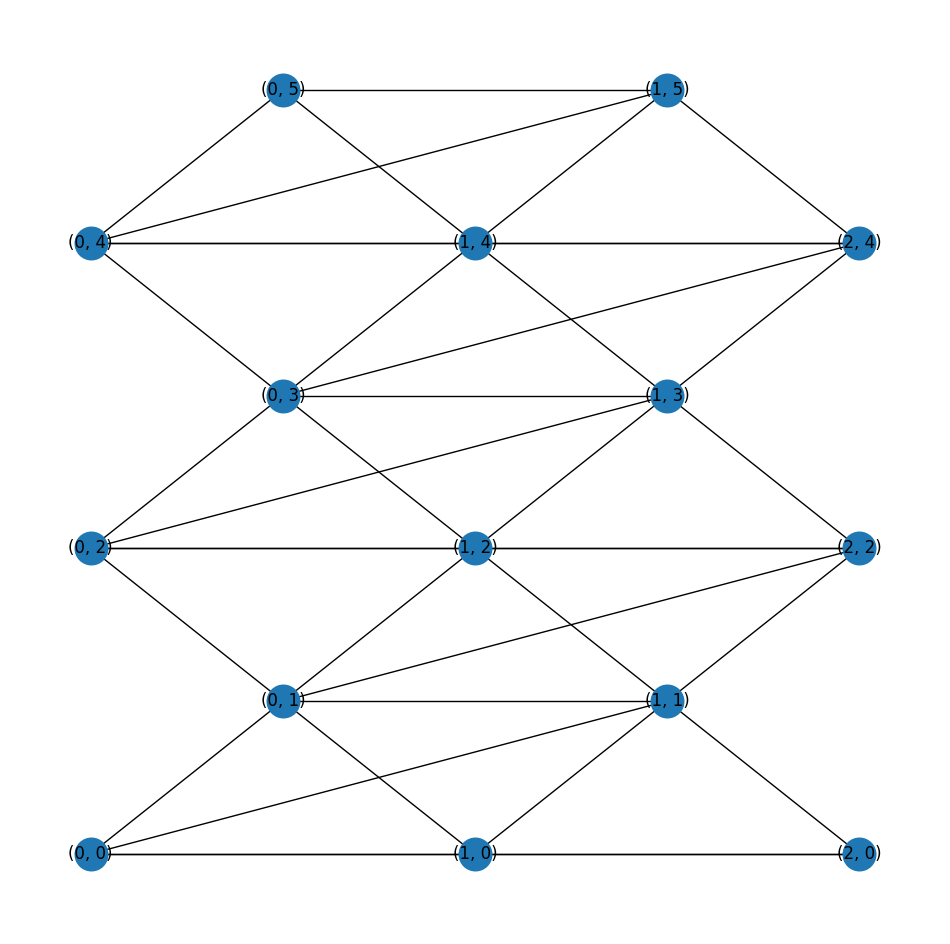

In [ ]:
draw_graph(G, pos, labels=True)

#### 2.8

In [ ]:
def generate_edges_tri(m, n, row_circ=False, col_circ=False):
    edges = []
    if n%2==0:
        nodes_bottom_c = n//2 + 1
        if m%2==0:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            for row_pos in range(m):
                for col_pos in range(n//2+1):
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=n//2:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        if row_pos%2!=0:
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos+1)))
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos-1)))
        else:
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            edges.extend([((i, m), (i+1, m-1)) for i in range(n//2)])
            for row_pos in range(m):
                for col_pos in range(n//2+1):
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=n//2:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        if row_pos!=0 and row_pos%2==1:
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos+1)))
                            edges.append(((col_pos, row_pos), (col_pos+(-1)**(row_pos+1), row_pos-1)))
    else:
        if m%2==0:
            nodes_bottom_c = n//2 + 2
            edges.extend([((i, m), (i+1, m)) for i in range(n//2+1)])
            for row_pos in range(m):
                nodes_in_row = n//2 + 1 + (row_pos+1)%2
                for col_pos in range(nodes_in_row):
                    if col_pos < n//2 + 1:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if col_pos!=nodes_in_row-1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                    if row_pos%2==1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos+1)))
        else:
            nodes_bottom_c = n//2 + 1
            edges.extend([((i, m), (i+1, m)) for i in range(n//2)])
            edges.extend([((i, m), (i+1, m-1)) for i in range(n//2+1)])
            for row_pos in range(m):
                nodes_in_row = n//2 + 1 + (row_pos+1)%2
                for col_pos in range(nodes_in_row):
                    if col_pos < nodes_in_row - 1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    if row_pos%2==1:
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos+1, row_pos+1)))
                        if col_pos == nodes_in_row-1:
                            edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
    if col_circ:
        if m%2==1 and n%2==1:
            edges.extend([((i, 0), (i, m)) for i in range(nodes_bottom_c)])
            edges.extend([((i, 0), (i-1, m)) for i in range(1, nodes_bottom_c+1)])
        else:
            edges.extend([((i, 0), (i, m)) for i in range(nodes_bottom_c)])
            edges.extend([((i, 0), (i-1, m)) for i in range(1, nodes_bottom_c)])
    if row_circ:
        if n%2==0:
            edges.extend([((0, i), (n//2, i)) for i in range(m+1)])
            edges.extend([((0, i), (n//2, i-1)) for i in range(1, m+1)])
        else:
            edges.extend([((0, i), (n//2+(i+1)%2, i)) for i in range(m+1)])
            edges.extend([((0, i-1), (n//2, i)) for i in range(1, m+1, 2)])
            edges.extend([((0, i-1), (n//2+1, i)) for i in range(2, m+1, 2)])




    return edges

In [ ]:
def create_triangular_lattice_graph(m, n, row_circ=False, col_circ=False): # m - column count of triangles, n - row count of triangles
    G = nx.Graph()
    nodes = []
    if n == 0 or m == 0:
        nodes = []
        G.add_nodes_from(nodes)
        return G
    elif n%2==1:
        for row_pos in range(m+1):
            max_nodes_in_row = n//2 + 1 + (row_pos+1)%2
            for col_pos in range(max_nodes_in_row):
                nodes.append(((col_pos, row_pos), {'pos': (col_pos+(row_pos%2)/2, row_pos)}))
    else:
        for row_pos in range(m+1):
            max_nodes_in_row = n//2+1 if m%2==0 else n//2+1
            for col_pos in range(max_nodes_in_row):
                nodes.append(((col_pos, row_pos), {'pos': (col_pos+(row_pos%2)/2, row_pos)}))
    edges = generate_edges_tri(m, n, row_circ, col_circ)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_triangular_lattice_graph(4, 4, row_circ=True)
pos = nx.get_node_attributes(G, 'pos')

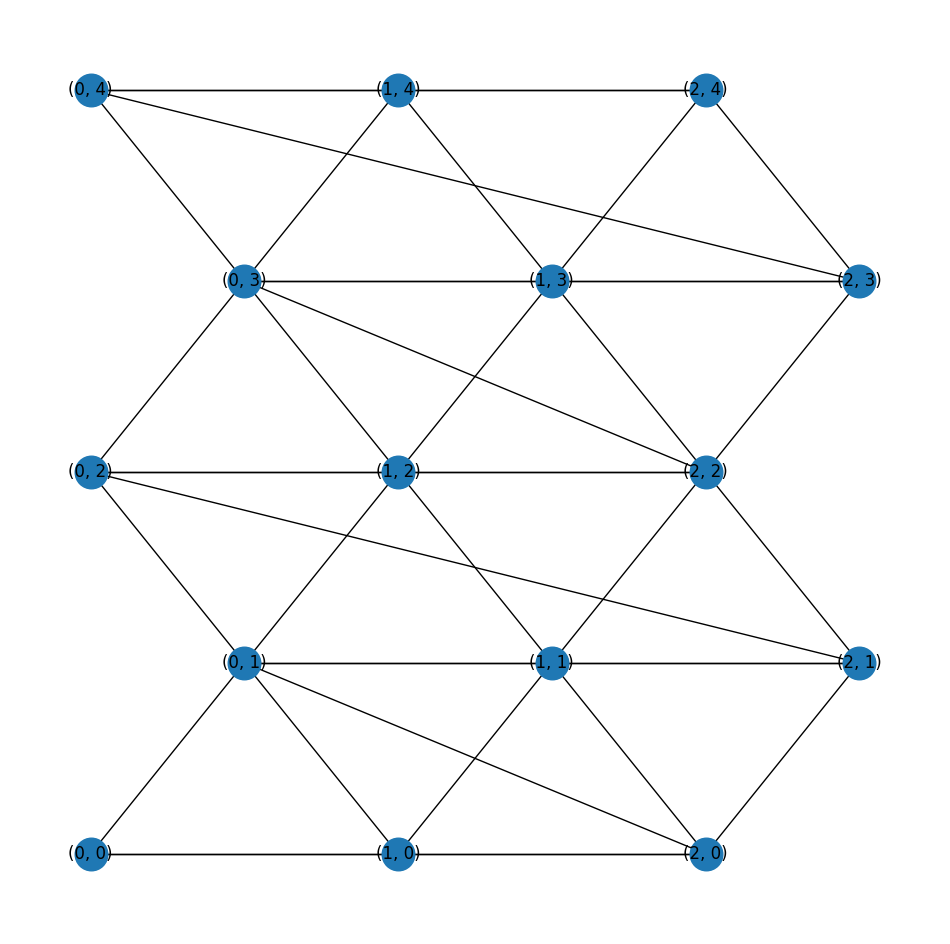

In [ ]:
draw_graph(G, pos, labels=True)

### 2.9 - 2.12

#### 2.9

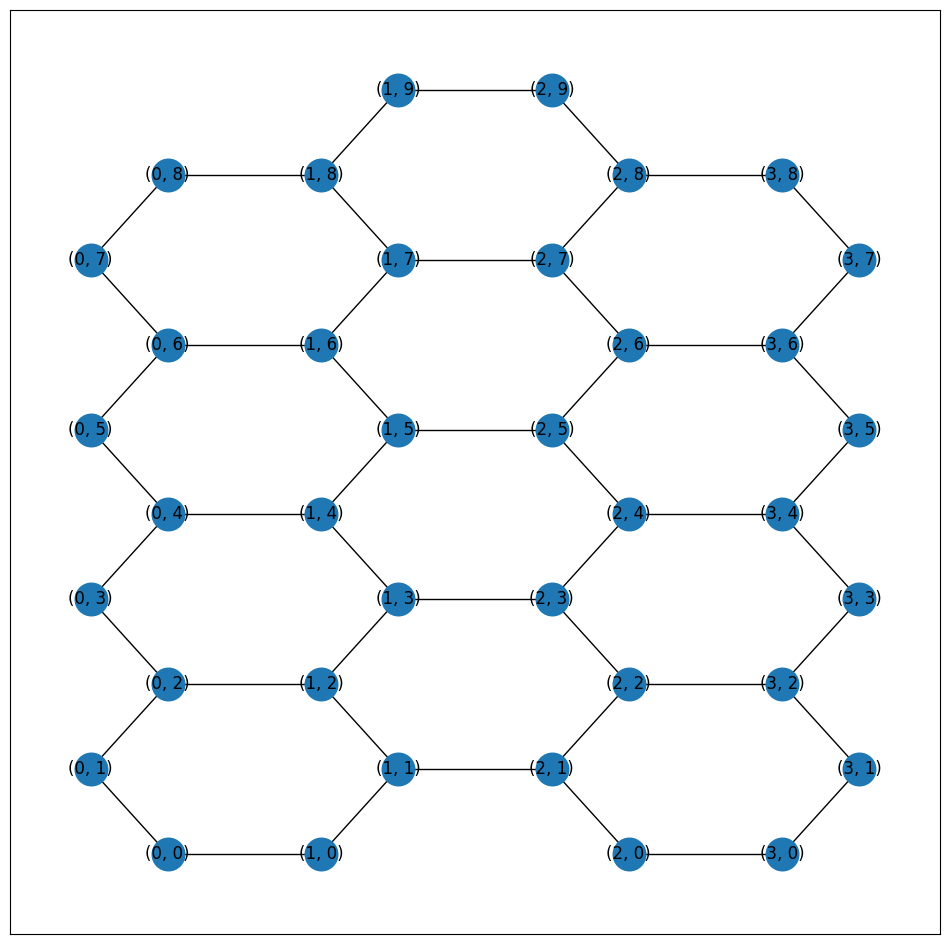

In [ ]:
m,n = 4, 3
G = nx.hexagonal_lattice_graph(m, n, periodic=False, with_positions=True, create_using=None)
pos = nx.get_node_attributes(G, 'pos')
draw_graph(G, pos, labels=True)

#### 2.10

In [ ]:
def generate_edges_hex(m, n, nodes):
    edges = []
    for node in nodes:
        col_pos, row_pos = node[0]
        if row_pos%2==0:
            if col_pos%2==0 and col_pos!=n:
                edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
        else:
            if col_pos%2==1:
                if col_pos!=n:
                    edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                if row_pos!=2*m+1:
                    edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                else:
                    edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
            else:
                if col_pos%2==0:
                    if row_pos==2*m+1:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
                    elif row_pos==1 and col_pos==n:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    else:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))


    return edges

In [ ]:
def create_hex_lattice_graph(m, n): # m - column count of triangles, n - row count of triangles
    G = nx.Graph()
    nodes = []
    if n == 0 or m == 0:
        nodes = []
        G.add_nodes_from(nodes)
        return G
    elif n%2==0:
        for row_pos in range(2*m+2):
            for col_pos in range(n+1):
                if row_pos==0:
                    if col_pos<n:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+col_pos//2, row_pos*(3**(1/2)/2))}))
                    else:
                        continue
                elif row_pos%2==1:
                    if col_pos==0 and row_pos!=2*m+1:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos-1/2, row_pos*(3**(1/2)/2))}))
                    elif row_pos!=2*m+1 or col_pos!=0:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+(col_pos+1)//2-1/2, row_pos*(3**(1/2)/2))}))
                elif row_pos%2==0:
                    nodes.append(((col_pos, row_pos), {'pos': (col_pos+col_pos//2, row_pos*(3**(1/2)/2))}))
    else:
        for row_pos in range(2*m+2):
            for col_pos in range(n+1):
                if row_pos!=2*m+1:
                    if row_pos%2==0:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+1/2+col_pos//2, row_pos*(3**(1/2)/2))}))
                    else:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+(col_pos+1)//2, row_pos*(3**(1/2)/2))}))
                else:
                    if col_pos < n and col_pos!=0:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+(col_pos+1)//2, row_pos*(3**(1/2)/2))}))

    edges = generate_edges_hex(m, n, nodes)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_hex_lattice_graph(3, 5)
pos = nx.get_node_attributes(G, 'pos')

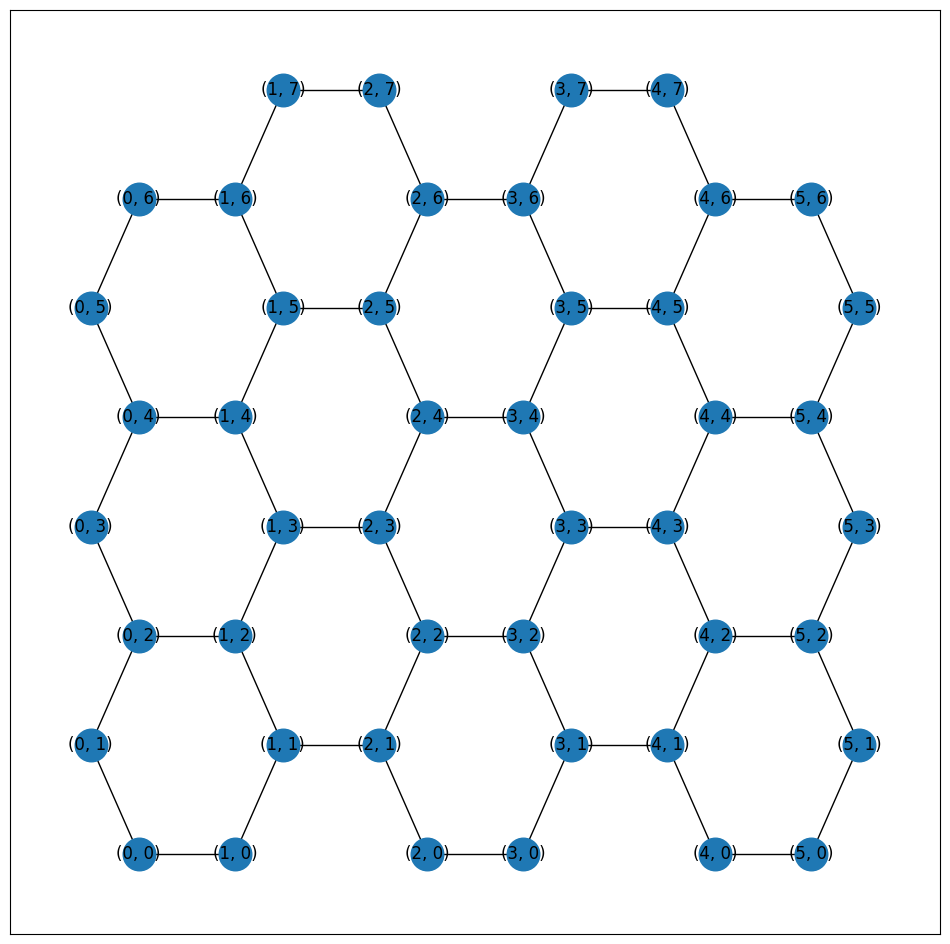

In [ ]:
draw_graph(G, pos, labels=True)

#### 2.11

In [ ]:
def generate_edges_hex(m, n, nodes):
    edges = []
    for node in nodes:
        col_pos, row_pos = node[0]
        if row_pos%2==0:
            if col_pos%2==0 and col_pos!=n:
                edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
        else:
            if col_pos%2==1:
                if col_pos!=n:
                    edges.append(((col_pos, row_pos), (col_pos+1, row_pos)))
                if row_pos!=2*m+1:
                    edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
                    edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                else:
                    edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
            else:
                if col_pos%2==0:
                    if row_pos==2*m+1:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
                    elif row_pos==1 and col_pos==n:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))
                    else:
                        edges.append(((col_pos, row_pos), (col_pos, row_pos-1)))
                        edges.append(((col_pos, row_pos), (col_pos, row_pos+1)))


    return edges

In [ ]:
def create_hex_lattice_graph(m, n): # m - column count of triangles, n - row count of triangles
    G = nx.Graph()
    nodes = []
    if n == 0 or m == 0:
        nodes = []
        G.add_nodes_from(nodes)
        return G
    elif n%2==0:
        for row_pos in range(2*m+2):
            for col_pos in range(n+1):
                if row_pos==0:
                    if col_pos<n:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+col_pos//2, row_pos*(3**(1/2)/2))}))
                    else:
                        continue
                elif row_pos%2==1:
                    if col_pos==0 and row_pos!=2*m+1:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos-1/2, row_pos*(3**(1/2)/2))}))
                    elif row_pos!=2*m+1 or col_pos!=0:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+(col_pos+1)//2-1/2, row_pos*(3**(1/2)/2))}))
                elif row_pos%2==0:
                    nodes.append(((col_pos, row_pos), {'pos': (col_pos+col_pos//2, row_pos*(3**(1/2)/2))}))
    else:
        for row_pos in range(2*m+2):
            for col_pos in range(n+1):
                if row_pos!=2*m+1:
                    if row_pos%2==0:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+1/2+col_pos//2, row_pos*(3**(1/2)/2))}))
                    else:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+(col_pos+1)//2, row_pos*(3**(1/2)/2))}))
                else:
                    if col_pos < n and col_pos!=0:
                        nodes.append(((col_pos, row_pos), {'pos': (col_pos+(col_pos+1)//2, row_pos*(3**(1/2)/2))}))

    edges = generate_edges_hex(m, n, nodes)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [ ]:
G = create_hex_lattice_graph(3, 5)
pos = nx.get_node_attributes(G, 'pos')

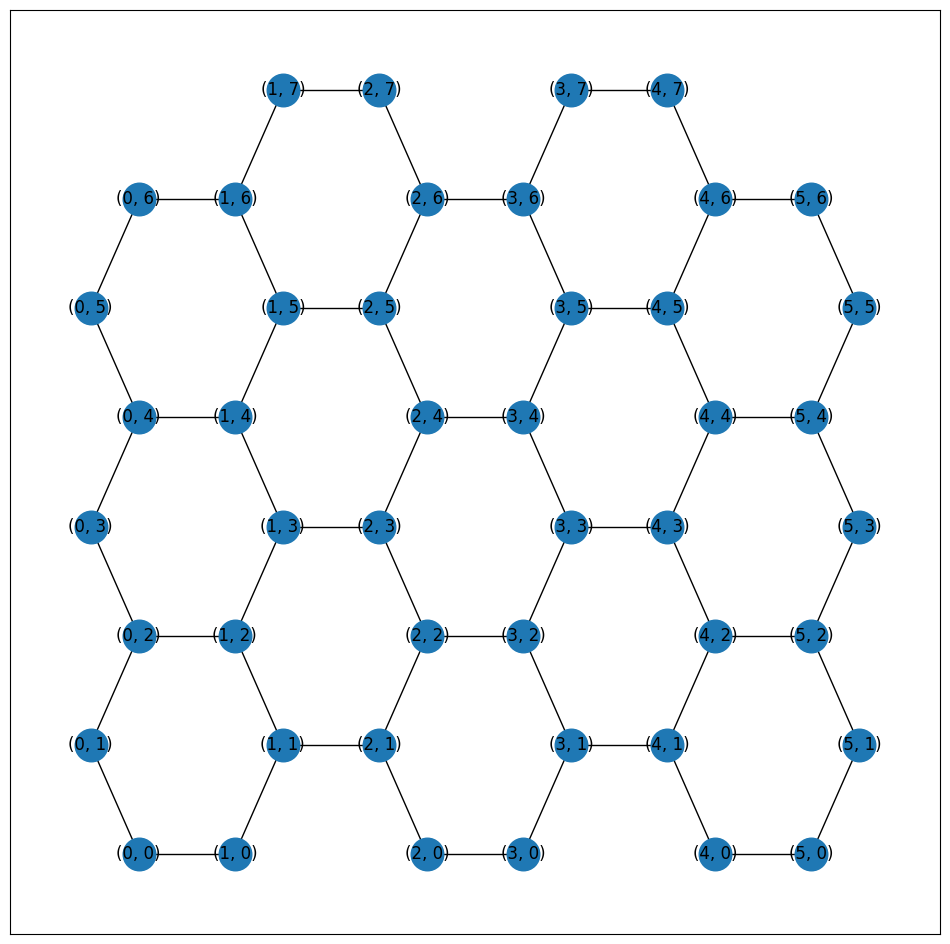

In [ ]:
draw_graph(G, pos, labels=True)

#### 2.12

In [ ]:
# не понимаю, с треугольниками еще можно было попытаться, но тут...

## 3.

3\.
Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис).

__1,2 цветок:__
![1,2 цветок](https://drive.google.com/uc?export=view&id=1mweK-1d1fIt7Ex_e-E1iEokJmR95bpBd "1,2 цветок")

__2,2 цветок:__
![2,2 цветок](https://drive.google.com/uc?export=view&id=1OFbjRSvP3hfxFyp3vbtgph7TawVJvxx0 "2,2 цветок")


3\.1\. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения.

Для построенного граафа 1.2 цветка получить:

3\.2\. Количество узлов, количество связей, среднюю степень узла.

3\.3\. Визуализацию графа (с указанием идентификаторов узлов).

3\.4\. Степень каждого узла и сохранить информацию о ней в самом узле.

3\.5\. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

### 3.1

In [4]:
def expand(G):
  G_size = len(list(G.nodes))
  start_edges = list(G.edges)
  for edge in start_edges:
    G_size+=1
    G.add_node(G_size, degree=2)
    G.add_edge(edge[0], G_size)
    G.add_edge(edge[1], G_size)
    G.nodes[edge[0]]['degree'] +=1
    G.nodes[edge[1]]['degree'] +=1
  return G

In [5]:
def fractal12_graph(n):
  G = nx.Graph()
  G.add_nodes_from([(1, {'degree': 1}), (2, {'degree': 1})])
  G.add_edge(1, 2)
  for i in range(n):
    G = expand(G)
  return G

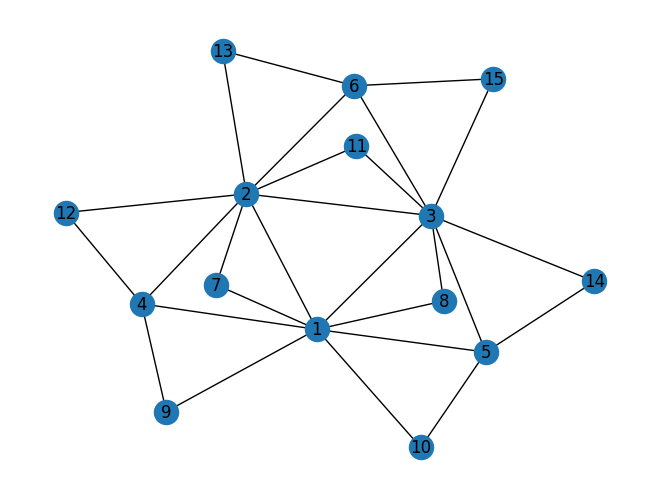

In [23]:
G = fractal12_graph(3)
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)

### 3.2

In [25]:
node_c = len(G.nodes)
edge_c = len(G.edges)
mean_node_degree = edge_c*2/node_c

In [26]:
print(f'node count = {node_c}\nedge count = {edge_c}\nmean node degree={mean_node_degree}')

node count = 15
edge count = 27
mean node degree=3.6


### 3.3

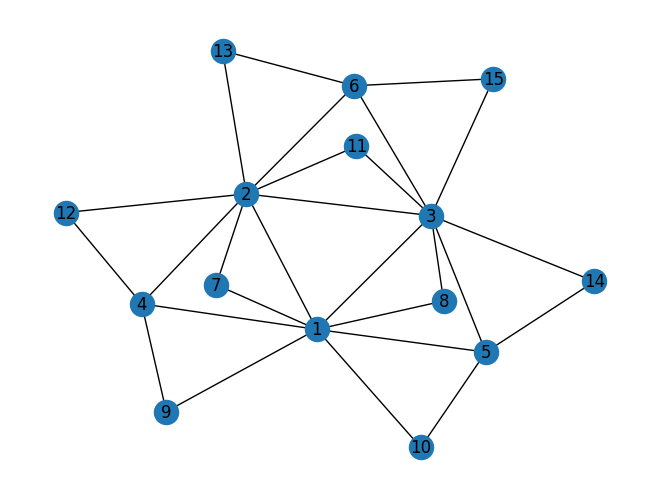

In [24]:
nx.draw(G, pos=pos, with_labels=True)

### 3.4

In [27]:
degrees = nx.get_node_attributes(G, 'degree')
for key, val in degrees.items():
    print(f'node name = {key}, node degree = {val}')

node name = 1, node degree = 8
node name = 2, node degree = 8
node name = 3, node degree = 8
node name = 4, node degree = 4
node name = 5, node degree = 4
node name = 6, node degree = 4
node name = 7, node degree = 2
node name = 8, node degree = 2
node name = 9, node degree = 2
node name = 10, node degree = 2
node name = 11, node degree = 2
node name = 12, node degree = 2
node name = 13, node degree = 2
node name = 14, node degree = 2
node name = 15, node degree = 2


### 3.5

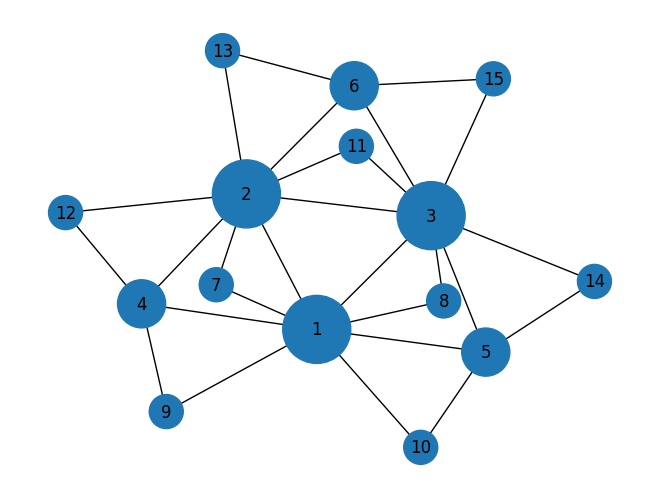

In [28]:
nx.draw(G, pos=pos, with_labels=True, node_size=[300*degree for degree in degrees.values()])

# 4.

Датасеты с сетями:

http://networkrepository.com

http://konect.uni-koblenz.de

https://snap.stanford.edu/data/

---

https://networkdata.ics.uci.edu/resources.php

https://kateto.net/2016/05/network-datasets/


Документация:
* https://networkx.github.io/documentation/stable/reference/readwrite/index.html



# 4.

Для построенного граафа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4\.7 Среднее значение коэффицента кластеризации для всего графа. (? разные)

### 4.1

In [29]:
def count_cluster(G):
    clusters = nx.clustering(G)
    for node in list(clusters):
        G.nodes[node]['cluster_coef'] = clusters[node]
    return G

In [34]:
G = count_cluster(G)
nx.get_node_attributes(G, 'cluster_coef')

{1: 0.25,
 2: 0.25,
 3: 0.25,
 4: 0.5,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0}

### 4.2

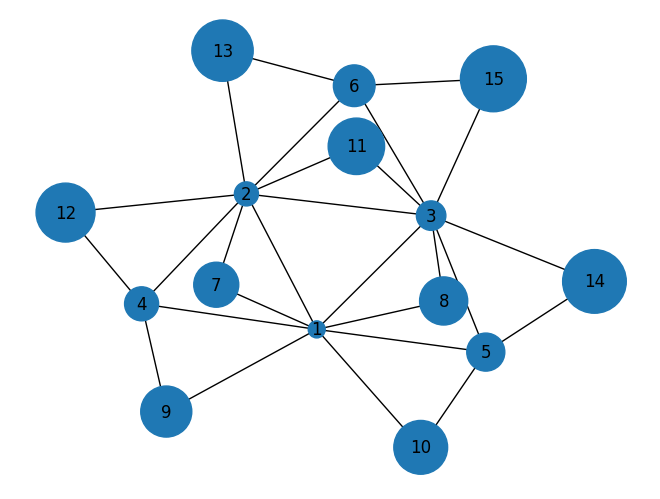

In [35]:
nx.draw(G, pos=pos, with_labels=True, node_size=[150*coef for coef in nx.get_node_attributes(G, 'cluster_coef')])

### 4.5

In [102]:
def gen_color_scheme(elements):
    color_map = matplotlib.colors.ListedColormap(matplotlib.colormaps.get_cmap('gist_rainbow')(np.linspace(0, 1, len(elements))))
    color_sh = {}
    for i, el in enumerate(elements):
        color_sh[el] = color_map.colors[i]
    return color_sh
def gen_colors_for_nodes(G):
    clust = set(nx.get_node_attributes(G, 'cluster_coef').values())
    color_sh = gen_color_scheme(clust)
    colors = [color_sh[clust_coef] for clust_coef in nx.get_node_attributes(G, 'cluster_coef').values()]
    return colors

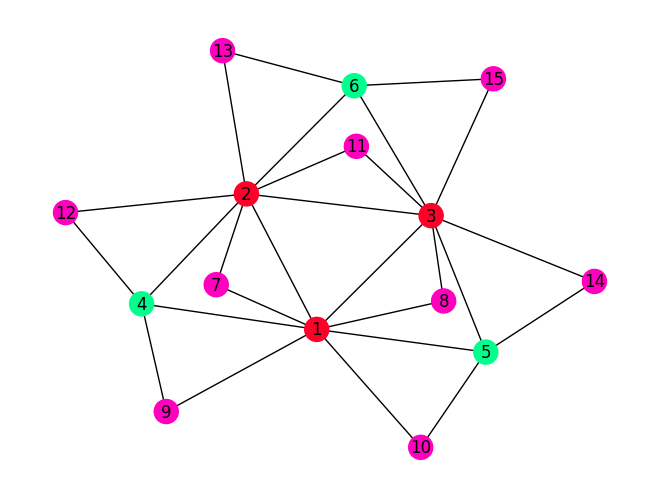

In [103]:
nx.draw(G, pos=pos, with_labels=True, node_color=gen_colors_for_nodes(G))

### 4.6

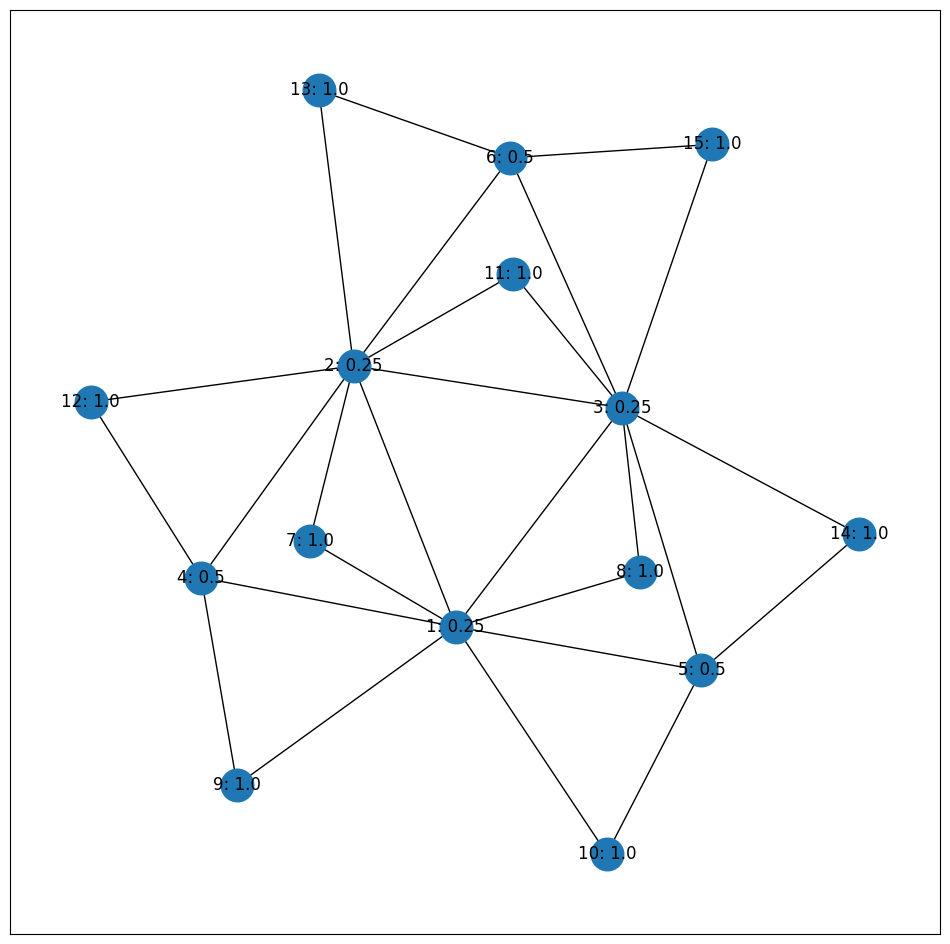

In [126]:
draw_graph(G, pos,labels={node[0]: f'{node[0]}: {node[1]}' for node in nx.get_node_attributes(G, 'cluster_coef').items()})

### 4.7

In [129]:
print(f'avg clust coef = {np.mean(list(nx.get_node_attributes(G, "cluster_coef").values()))}')

avg clust coef = 0.75


# 5.

Для построенного граафа 1.2 цветка получить:

4\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

4\.2 График распределения степеней узлов.4

4\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

### 4.1

In [152]:
def count_degrees(G):
    arr = {}
    for degree in nx.get_node_attributes(G, 'degree').values():
        if arr.get(degree):
            arr[degree] +=1
        else:
            arr[degree] = 1
    arr = list(arr.items())
    return sorted(arr, key=lambda x: x[0])

In [153]:
count_degrees(G)

[(2, 9), (4, 3), (8, 3)]

### 4.2

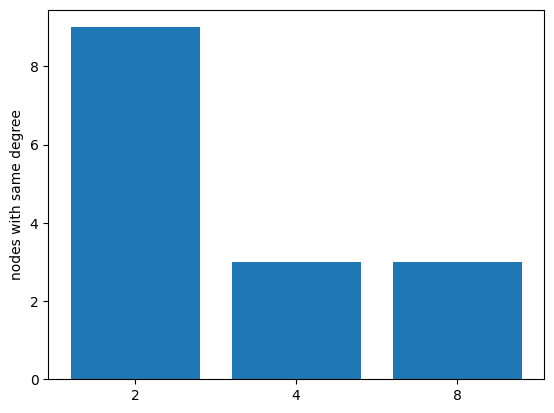

In [167]:
degrees = count_degrees(G)

degree = [x[0] for x in degrees]
count = [x[1] for x in degrees]
x_pos = np.arange(len(degree))

plt.bar(x_pos, count,align='center')
plt.xticks(x_pos, degree)
plt.ylabel('nodes with same degree')
plt.show()

### 4.3

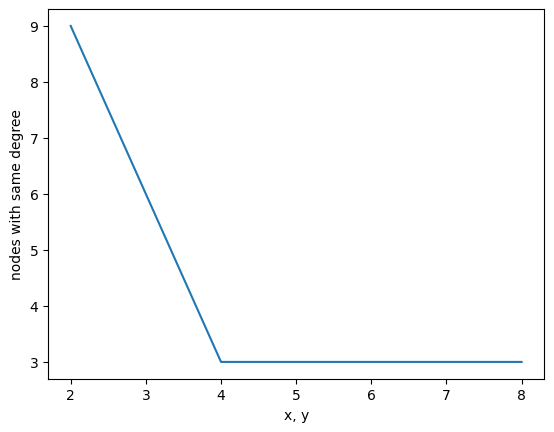

In [176]:
plt.plot(degree, count)

plt.ylabel('nodes with same degree')
plt.xlabel('x, y')
plt.show()

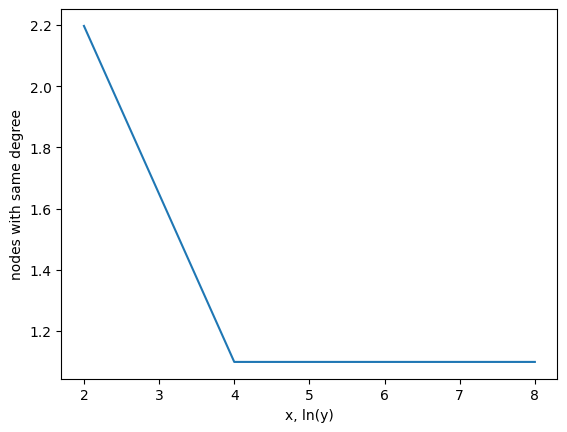

In [177]:
plt.plot(degree, [np.log(i) for i in count])

plt.ylabel('nodes with same degree')
plt.xlabel('x, ln(y)')
plt.show()

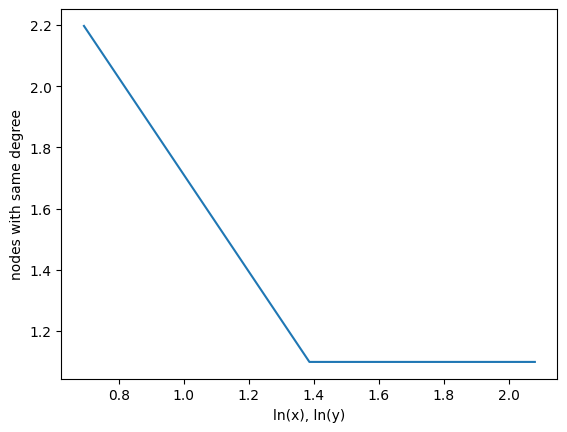

In [179]:
plt.plot([np.log(i) for i in degree], [np.log(i) for i in count])

plt.ylabel('nodes with same degree')
plt.xlabel('ln(x), ln(y)')
plt.show()

## 6.

Для построенного граафа 1.2 цветка получить:

5\.1\. Два произвольных узла и кратчайший путь между ними.

5\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

5\.3\. Средний кратчайший путь для всего графа.

5\.4\. Диаметр графа.

### 5.1

In [183]:
node0, node1 = np.random.randint(len(G.nodes), size=2)
print(node0, node1)

8 2


In [185]:
path = nx.dijkstra_path(G, node0, node1)
path

[8, 1, 2]

In [186]:
def gen_path(path):
    edges = []
    for i in range(len(path)-1):
        edges.append((path[i], path[i+1]))
    return edges

In [187]:
gen_path(path)

[(8, 1), (1, 2)]

### 5.2

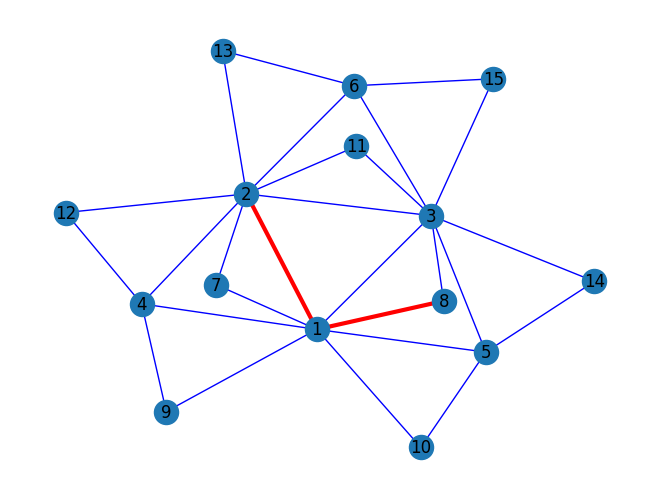

In [193]:
nx.draw(G, pos=pos, with_labels=True, edge_color=['red' if edge in gen_path(path) or (edge[1], edge[0]) in gen_path(path) else 'blue' for edge in G.edges()], width=[3 if edge in gen_path(path) or (edge[1], edge[0]) in gen_path(path) else 1 for edge in G.edges()])

### 5.3

In [196]:
print(f'avg shortest path = {nx.average_shortest_path_length(G)}')

avg shortest path = 1.9428571428571428


### 5.4

In [197]:
print(f'graph diameter: {nx.diameter(G)}')

graph diameter: 3


## 7.

7\. Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения.

In [198]:
def UVflower_expand(G, u, v):
  G_size = len(list(G.nodes))
  start_edges = list(G.edges)
  if v != 1 and u != 1 :
    G.remove_edges_from(start_edges)
  for edge in start_edges:
    for i in [u,v]:
      if i!=1:
        G_size+=1
        G.add_edge(edge[0], G_size)
        for i in range(i-2):
          G_size+=1
          G.add_edge(G_size-1, G_size)
        G.add_edge(edge[1], G_size)

  return G

In [199]:
def UVflower(u, v, n):
  G = nx.Graph()
  G.add_edge(1, 2)
  for i in range(n):
    G = UVflower_expand(G, u, v)
  return G

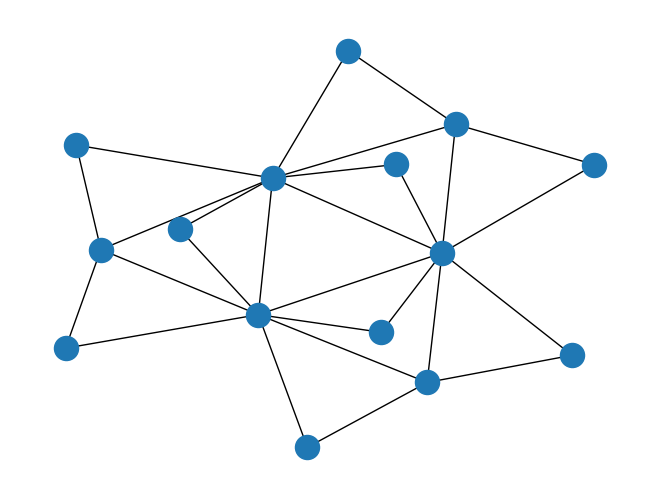

In [200]:
G = UVflower(1, 2, 3)
nx.draw(G)

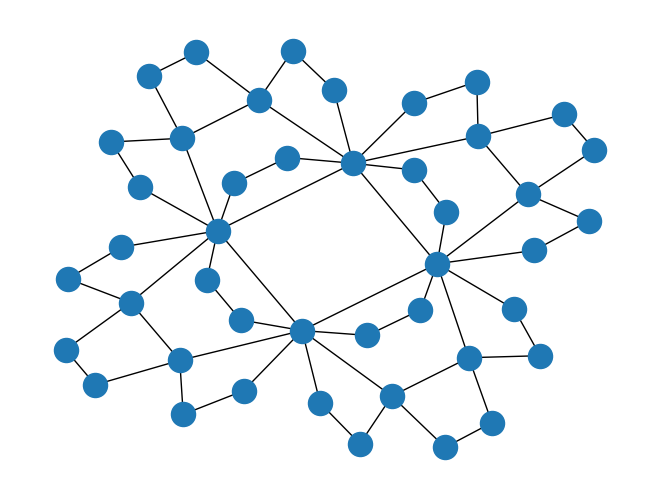

In [203]:
G = UVflower(1, 3, 3)
nx.draw(G)